## Imports

In [8]:
import torch
from torchvision import datasets, transforms
import torchvision.models as models
import torch.optim as optim
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

## Dataset augmentation

In [ ]:
# Define data augmentation transformations
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Dataset with augmentations
trainset_augmented = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader_augmented = torch.utils.data.DataLoader(trainset_augmented, batch_size=64, shuffle=True)

# Dataset without augmentations
trainset_original = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader_original = torch.utils.data.DataLoader(trainset_original, batch_size=64, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


## Model traning

In [ ]:
model = models.resnet18(pretrained=False)
model.fc = torch.nn.Linear(model.fc.in_features, 10)  # Adjust output layer for CIFAR-10 classes

def train_model(model, trainloader, epochs=10):
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

    model.train()
    for epoch in range(epochs):
        for inputs, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

# Train on augmented data
train_model(model, trainloader_augmented, epochs=5)

# Train on original data
train_model(model, trainloader_original, epochs=5)

c:\Users\skypl\Documents\GitHub\DP\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\skypl\Documents\GitHub\DP\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


## Feature extraction

In [11]:
def extract_features(model, dataloader):
    model.eval()
    features = []
    labels = []
    with torch.no_grad():
        for inputs, lbls in dataloader:
            output = model(inputs)
            features.append(output.numpy())
            labels.append(lbls.numpy())
    return np.concatenate(features), np.concatenate(labels)

features_augmented, labels_augmented = extract_features(model, trainloader_augmented)
features_original, labels_original = extract_features(model, trainloader_original)

# Combine features for t-SNE visualization
combined_features = np.concatenate([features_augmented, features_original])
combined_labels = np.concatenate([labels_augmented, labels_original])

## t-SNE visualization

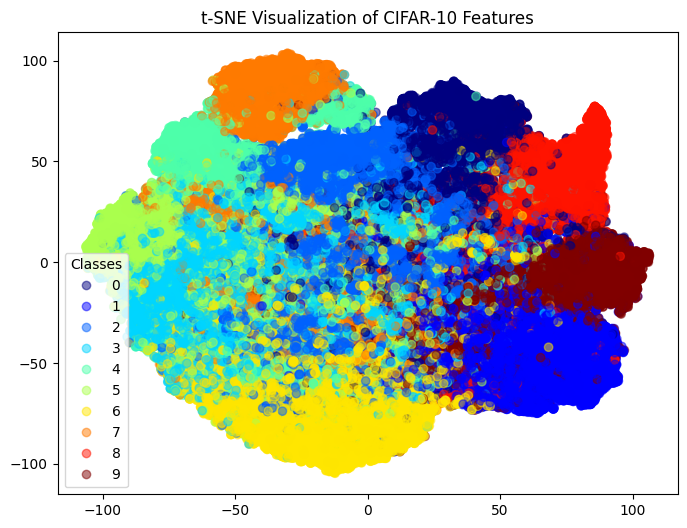

In [12]:
tsne = TSNE(n_components=2)
reduced_features = tsne.fit_transform(combined_features)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=combined_labels, cmap='jet', alpha=0.5)
plt.legend(*scatter.legend_elements(), title="Classes")
plt.title("t-SNE Visualization of CIFAR-10 Features")
plt.show()